In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
### load the dataset called iris , which comes along with seaborn library.
iris= sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


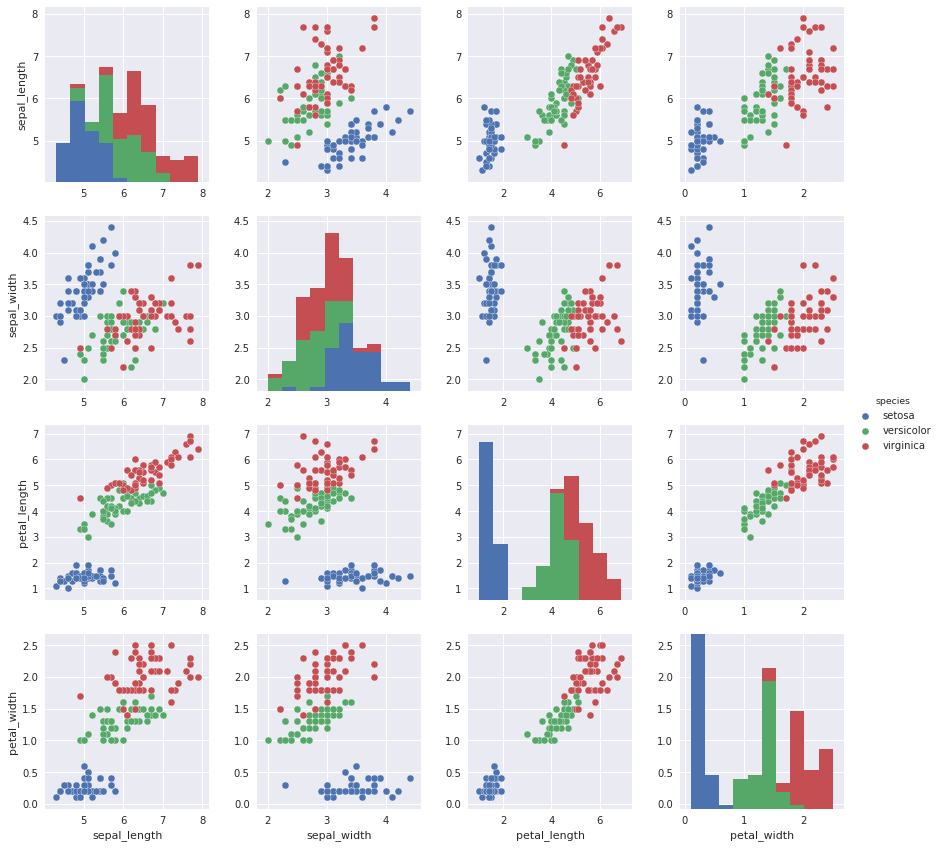

In [6]:
%matplotlib inline
sns.set()
sns.pairplot(iris,hue='species',size=3)

In [27]:
### Separate features/independant and target/dependant values into X & Y
### Here 'species' is the target column , rest are features.
X_iris=iris.drop('species',axis=1)
print(X_iris.shape)
y_iris=iris['species']
#y_iris=y_iris[:,np.newaxis]
print(y_iris.shape)

(150, 4)
(150,)


In [32]:
### Supervised iris Classification ###
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_iris,y_iris,random_state=1)

In [33]:
### Use GaussianNB algorithm for classication
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain,ytrain)
### y_model is the predicted target vector
y_model=model.predict(Xtest)

In [39]:
### To check the accuracy of the predicted value
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,y_model)
print('Accuracy of the predicted values is :{0:.2f}%'.format(acc*100))

Accuracy of the predicted values is :97.37%


In [40]:
### Unsupervised learning: dimensionality reduction and Clustering
from sklearn.decomposition import PCA   #PCA-> Principle component analysis
modeldim=PCA(n_components=2)
modeldim.fit(X_iris)
X2d=modeldim.transform(X_iris)

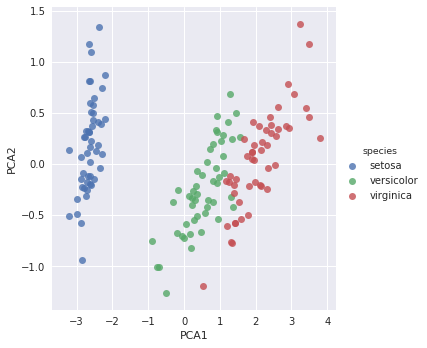

In [41]:
iris['PCA1']=X2d[:,0];iris['PCA2']=X2d[:,1]
sns.lmplot("PCA1","PCA2",hue='species',data=iris,fit_reg=False)

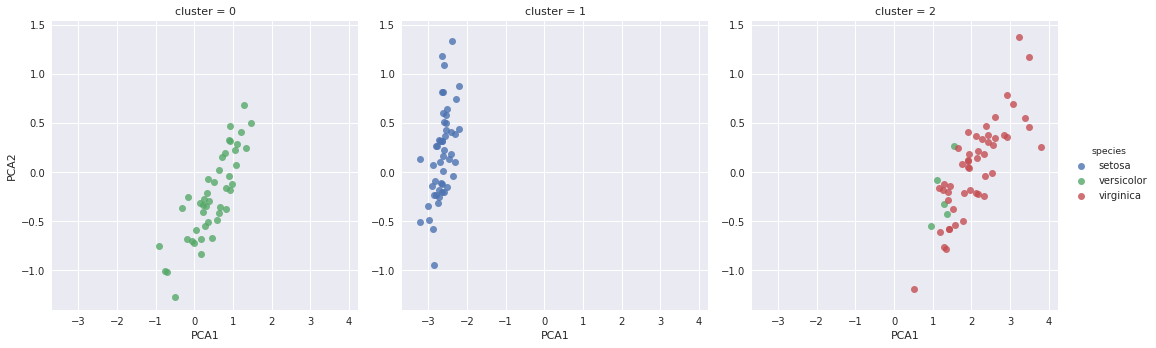

In [44]:
### Clustering
from sklearn.mixture import GaussianMixture
modelclust=GaussianMixture(n_components=3,covariance_type='full') # Instantiate model
modelclust.fit(X_iris)                                     # Fit the model, y isn't specified!
y_gmm=modelclust.predict(X_iris)                      # determine clustering labels!

## update result
iris['cluster']=y_gmm
sns.lmplot("PCA1","PCA2",hue='species',data=iris,fit_reg=False,col='cluster')